# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
from matplotlib.gridspec  import GridSpec
from mpl_toolkits.mplot3d import Axes3D
from astropy.cosmology    import FlatLambdaCDM

# Constants

In [15]:
mpc_to_cm  = 3.086E24
h_alpha_wl = 6.563E-5   # in cm = 6563A

# Dataset

In [3]:
data = pd.read_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv')

In [4]:
data = data.fillna('SuperPassive')

#### UV upturn objects

In [5]:
uvup_data = data.loc[data['UV_CLASS_YI2011']=='UV_UPTURN']

In [6]:
data_gby = uvup_data.groupby('WHAN_CLASS')

In [7]:
data_count = data_gby.count()

In [8]:
order = [2,0,4,3,1]

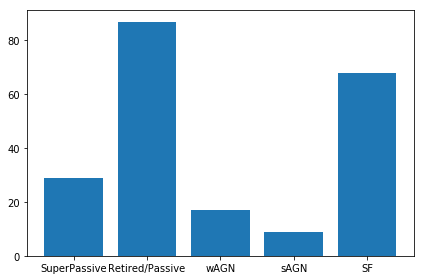

In [10]:
plt.bar(x=data_count.index.values[order], height=data_count['CATAID'].values[order])
plt.tight_layout()
plt.show()

# Cosmology

In [11]:
adopted_cosmology   = FlatLambdaCDM(H0=70, Om0=0.3)
luminosity_distance = adopted_cosmology.luminosity_distance(uvup_data['Z']).value

### Removing spurious H$\alpha$ measurements

In [12]:
rm_spur_halpha = np.where(uvup_data['HA_FLUX_COMP'].values!=-99999.)

In [19]:
luminosity = 4*np.pi*((luminosity_distance[rm_spur_halpha]/h_alpha_wl)**2)*(uvup_data['HA_EW_COMP'].
                                                                               iloc[rm_spur_halpha].values)
luminosity_cm = luminosity * mpc_to_cm

### SFR

In [21]:
sfr = (7.9E-42) * luminosity_cm # the wl correction 

In [62]:
bins = np.arange(start=0, stop=6, step=0.5)
alpha = 0.7

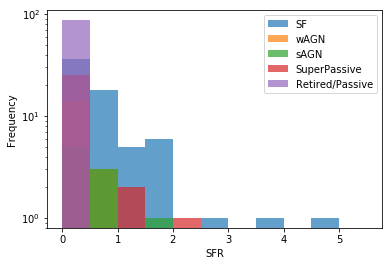

In [64]:
plt.hist(sfr[np.where(uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values=='SF')], bins=bins, log=True, alpha=alpha, 
         label='SF')
plt.hist(sfr[np.where(uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values=='wAGN')], bins=bins, log=True, alpha=alpha, 
         label='wAGN')
plt.hist(sfr[np.where(uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values=='sAGN')], bins=bins, log=True, alpha=alpha, 
         label='sAGN')
plt.hist(sfr[np.where(uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values=='SuperPassive')], bins=bins, log=True, 
         alpha=alpha, label='SuperPassive')
plt.hist(sfr[np.where(uvup_data['WHAN_CLASS'].iloc[rm_spur_halpha].values=='Retired/Passive')], bins=bins, log=True, 
         alpha=alpha, label='Retired/Passive')
plt.legend(loc='best')
plt.ylabel(r"Frequency")
plt.xlabel(r"SFR")
plt.show()